<a href="https://colab.research.google.com/github/HariniRavi490/DataMining_Assignment1/blob/main/DataMiningAssignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Data Preparation**



In the process of data preparation, I have imported the required libraries and successfully established a connection to the 'Assignment2023.sqlite' database file stored on my drive. The training dataframe was named as **train_df** and test dataframe was named as **test_df**.

In [108]:
%autosave 120
import sqlite3 as sql
# ! wget https://github.com/HariniRavi490/DataMining_Assignment1/blob/main/Assignment2023.sqlite
con = sql.connect('/content/Assignment2023.sqlite')
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from seaborn import load_dataset
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import StratifiedKFold, KFold, ShuffleSplit
train_df = pd.read_sql_query("select * from train", con)
test_df = pd.read_sql_query("select * from test", con)


Autosaving every 120 seconds


##Training Data Preparation

Examine the (`train_df`) for the irrelevant attributes and perform the code to check head and tail attribute in the following.

In [ ]:
train_df.head()

index       Att00      Att01      Att02      Att03  Att04       Att05  \
0      0  -31.576673  -9.700301 -24.911617   9.081612      0  208.272079   
1      1 -304.662214  46.607701  42.598150 -56.799268      1 -150.590555   
2      2  -32.937870 -13.109089 -60.390007 -39.580707      1 -154.421152   
3      3  -78.472517  12.418401 -76.958786 -17.175313      0  222.140482   
4      4 -141.399086  29.659121 -64.726164  -3.185066      1  116.402384   

      Att06     Att07      Att08  ...  Att21      Att22     Att23     Att24  \
0 -1.997841  1.454936 -26.600721  ...    952  11.266068 -3.217048  1.783540   
1  3.867761 -2.494264  11.174107  ...    101   8.088683  6.228109       NaN   
2 -3.761358 -0.980815  -6.615842  ...   -304  -8.360235 -6.056773       NaN   
3  3.870460  7.106521  -8.966390  ...   -352  -4.049348  6.232455       NaN   
4 -4.440180  4.239060   6.792401  ...    923  20.884454 -7.149853  1.635977   

   Att25  Att26      Att27      Att28      Att29  class  
0   CDJW      0 -33.257776 -30.187609  -2.026042    1.0  
1   CDJW      1 -49.197328  72.865869  -7.405605    0.0  
2   ASCZ      0  14.257560  69.972104 -32.162932    2.0  
3   ASCZ      0   0.484677 -43.876044  -6.770418    2.0  
4   CDJW      0 -38.951753  65.242059  90.457899    1.0  

[5 rows x 32 columns]

In [ ]:
train_df.tail()

index       Att00      Att01       Att02      Att03  Att04       Att05  \
4995   4995  -23.775480 -19.991697 -111.772817  -5.231927      0  -10.178848   
4996   4996  -72.905078 -71.574382   57.448852 -43.072713      0  284.966471   
4997   4997 -120.211340  47.567630   -3.380376  -7.430619      0  -52.586352   
4998   4998 -150.866248 -43.827281   42.474948 -12.971822      0 -126.065938   
4999   4999  -55.452318 -89.485509  117.651530 -17.761150      1  -48.405311   

         Att06     Att07      Att08  ...  Att21      Att22      Att23  Att24  \
4995  5.849754  6.897007   2.755233  ...    418  26.770633   9.419636    NaN   
4996 -0.418678 -3.481893 -14.930024  ...   -535  23.775356  -0.674181    NaN   
4997 -0.907130  2.181981  14.640818  ...    295 -30.455877  -1.460718    NaN   
4998 -3.924663 -2.428311 -12.615205  ...    753  21.557564  -6.319736    NaN   
4999 -7.173086 -3.276062  -9.803328  ...   -372  -3.843221 -11.550549    NaN   

      Att25  Att26      Att27       Att28      Att29  class  
4995   ASCZ      0  22.724272   26.547026  19.249082    2.0  
4996   CDJW      1 -44.162165   44.600663  76.351306    0.0  
4997   CDJW      1 -47.921561  -87.623624   7.011308    1.0  
4998   CDJW      1  -8.390719  137.160623 -41.006010    0.0  
4999   CDJW      1 -56.343928   99.248331  84.475654    0.0  

[5 rows x 32 columns]

In [ ]:
train_df.columns


Index(['index', 'Att00', 'Att01', 'Att02', 'Att03', 'Att04', 'Att05', 'Att06',
       'Att07', 'Att08', 'Att09', 'Att10', 'Att11', 'Att12', 'Att13', 'Att14',
       'Att15', 'Att16', 'Att17', 'Att18', 'Att19', 'Att20', 'Att21', 'Att22',
       'Att23', 'Att24', 'Att25', 'Att26', 'Att27', 'Att28', 'Att29', 'class'],
      dtype='object')

 During the analysis of the training data (`train_df`), I identified an attribute that does not contribute to the analysis and can be considered irrelevant. Specifically, I found that the index column serves no meaningful purpose for the analysis, and therefore, I have decided to remove this attribute from the dataset to streamline and optimize the data for further processing.

### Data Cleaning

 **Handling Irrelevant attributes**

In [109]:
train_df.drop(columns='index', inplace =True)

The index column was removed from the train_df and let's check for the missing entries in the data frame as a part of data cleaning.

**Handling Missing Values**

In [110]:
def missing(train_df):
  """
  For each attribute/column in the dataframe `df`, count the number of missing entries.
  Return a list of all the coulmns with more than 80% missing entries.
  """
  missing_dict = dict()
  total = train_df.shape[0] # shape[0] is the number of rows
  for attribute in train_df.columns:
    missing = train_df[attribute].isna().sum() # count the number of Null/nan/na values
    frac = missing/total * 100 # as a percentage
    missing_dict[attribute] = frac
  return missing_dict

In [111]:
m_values =missing(train_df)
m_values

{'Att00': 0.0,
 'Att01': 0.0,
 'Att02': 0.0,
 'Att03': 0.0,
 'Att04': 0.0,
 'Att05': 0.0,
 'Att06': 0.0,
 'Att07': 1.0,
 'Att08': 0.0,
 'Att09': 0.0,
 'Att10': 0.0,
 'Att11': 0.0,
 'Att12': 0.0,
 'Att13': 0.0,
 'Att14': 0.0,
 'Att15': 19.84,
 'Att16': 0.0,
 'Att17': 0.0,
 'Att18': 0.0,
 'Att19': 0.0,
 'Att20': 0.0,
 'Att21': 0.0,
 'Att22': 0.0,
 'Att23': 0.0,
 'Att24': 59.199999999999996,
 'Att25': 0.0,
 'Att26': 0.0,
 'Att27': 0.0,
 'Att28': 0.0,
 'Att29': 0.0,
 'class': 0.0}

After analyzing the dataset, I observed that three attributes contain missing values. To address this issue, I decided to remove attributes that have more than 15% missing values. Additionally, I found that the attribute "Att07" has 1% of missing values, and for this attribute, I opted to fill the missing values with the mean.

In [112]:
cols_to_drop = [ att for att,frac in m_values.items() if  frac > 15]

train_df.drop(columns=cols_to_drop,
           inplace=True)

The `Att24` and`Att15` have been dropped from the dataframe which holds 60% and 20% of missing values repectively.

In [113]:
cols_to_impute = [ att for att,frac in m_values.items() if 0< frac <5]
cols_to_impute

['Att07']

In the case of the "Att07" attribute, it was identified that it had 1% of missing values. To address this, I made the decision to impute the missing values with the mean value of that column, opting for this approach over filling them with zeros.

In [114]:
for col in cols_to_impute:
  # compute the mean
  mean = train_df[col].mean()
  # now use the fillna function to replace the NaN avalues with the mean value
  train_df[col].fillna(mean, inplace=True)

In [115]:
m_dict = missing(train_df)
for col in cols_to_impute:
  print(col, "missing data", m_dict[col])

Att07 missing data 0.0


The `Att07` missing values was replaced with mean values and all the missing values was handled.

**Handling Duplicates**

Detecting and addressing duplicates as part of data preprocessing is crucial to ensure that the model learns meaningful patterns and generalizes well to new, unseen data.

In [116]:
dups = train_df.duplicated()
dups.sum()

0

In our training dataset, we initially used the `duplicated()` method, which indicated that there were no duplicates with a sum of 0. However, if we round the decimal values to two decimal places and then recheck for duplicates, the result may change.

In [117]:
train_df=train_df.round(2)
dups = train_df.duplicated()
dups.sum()

43

After we rounded the decimal to two, we can able to detect 43 dulpicates. The duplicates will reduce the redundancy of the data which is the important step to be performed in the data preprocessing.

**Drop the Duplicates**

In [118]:
train_df.drop_duplicates()

Att00  Att01   Att02  Att03  Att04   Att05  Att06  Att07  Att08  Att09  \
0     -31.58  -9.70  -24.91   9.08      0  208.27  -2.00   1.45 -26.60  -1.47   
1    -304.66  46.61   42.60 -56.80      1 -150.59   3.87  -2.49  11.17   5.99   
2     -32.94 -13.11  -60.39 -39.58      1 -154.42  -3.76  -0.98  -6.62  -6.89   
3     -78.47  12.42  -76.96 -17.18      0  222.14   3.87   7.11  -8.97   1.31   
4    -141.40  29.66  -64.73  -3.19      1  116.40  -4.44   4.24   6.79  -5.89   
...      ...    ...     ...    ...    ...     ...    ...    ...    ...    ...   
4995  -23.78 -19.99 -111.77  -5.23      0  -10.18   5.85   6.90   2.76  -4.02   
4996  -72.91 -71.57   57.45 -43.07      0  284.97  -0.42  -3.48 -14.93  -3.90   
4997 -120.21  47.57   -3.38  -7.43      0  -52.59  -0.91   2.18  14.64  -7.66   
4998 -150.87 -43.83   42.47 -12.97      0 -126.07  -3.92  -2.43 -12.62   0.18   
4999  -55.45 -89.49  117.65 -17.76      1  -48.41  -7.17  -3.28  -9.80  -7.09   

      ...  Att20 Att21  Att22  Att23  Att25 Att26  Att27   Att28  Att29  class  
0     ...  -7.56   952  11.27  -3.22   CDJW     0 -33.26  -30.19  -2.03    1.0  
1     ... -72.97   101   8.09   6.23   CDJW     1 -49.20   72.87  -7.41    0.0  
2     ...  -7.89  -304  -8.36  -6.06   ASCZ     0  14.26   69.97 -32.16    2.0  
3     ... -18.79  -352  -4.05   6.23   ASCZ     0   0.48  -43.88  -6.77    2.0  
4     ... -33.87   923  20.88  -7.15   CDJW     0 -38.95   65.24  90.46    1.0  
...   ...    ...   ...    ...    ...    ...   ...    ...     ...    ...    ...  
4995  ...  -5.69   418  26.77   9.42   ASCZ     0  22.72   26.55  19.25    2.0  
4996  ... -17.46  -535  23.78  -0.67   CDJW     1 -44.16   44.60  76.35    0.0  
4997  ... -28.79   295 -30.46  -1.46   CDJW     1 -47.92  -87.62   7.01    1.0  
4998  ... -36.13   753  21.56  -6.32   CDJW     1  -8.39  137.16 -41.01    0.0  
4999  ... -13.28  -372  -3.84 -11.55   CDJW     1 -56.34   99.25  84.48    0.0  

[4957 rows x 29 columns]

### Feature Encoding

After completing the data cleaning process, the next step is to encode the features in a way that makes them suitable for further analysis, which involves considering whether they should be treated as numerical or categorical variables. This encoding step is crucial for performing subsequent tasks such as feature selection and scaling.

In [119]:
categorical_attribute = train_df.select_dtypes(include='object').columns
categorical_attribute

Index(['Att11', 'Att16', 'Att25'], dtype='object')

In the `train_df` dataset, there are three columns that contain categorical data, while the remaining columns consist of numerical data. To handle the categorical variables during the feature encoding process, we can apply a technique known as "One-Hot Encoding."

In [120]:
ohe = OneHotEncoder()

ct = ColumnTransformer([('one-hot-encoder', OneHotEncoder(drop='first'),['Att11','Att16','Att25'])], remainder='passthrough')

ct.fit_transform(train_df)

array([[  0.  ,   0.  ,   0.  , ..., -30.19,  -2.03,   1.  ],
       [  0.  ,   0.  ,   0.  , ...,  72.87,  -7.41,   0.  ],
       [  0.  ,   0.  ,   0.  , ...,  69.97, -32.16,   2.  ],
       ...,
       [  0.  ,   0.  ,   1.  , ..., -87.62,   7.01,   1.  ],
       [  0.  ,   0.  ,   0.  , ..., 137.16, -41.01,   0.  ],
       [  0.  ,   1.  ,   0.  , ...,  99.25,  84.48,   0.  ]])

After encoded the categorical variables are consideres as the numerical data and store the transformed dataframe in the `train_df` for further processes.

In [121]:
train_df = pd.get_dummies(train_df, columns=['Att11','Att16','Att25'], drop_first=True)
print(train_df)

       Att00  Att01   Att02  Att03  Att04   Att05  Att06  Att07  Att08  Att09  \
0     -31.58  -9.70  -24.91   9.08      0  208.27  -2.00   1.45 -26.60  -1.47   
1    -304.66  46.61   42.60 -56.80      1 -150.59   3.87  -2.49  11.17   5.99   
2     -32.94 -13.11  -60.39 -39.58      1 -154.42  -3.76  -0.98  -6.62  -6.89   
3     -78.47  12.42  -76.96 -17.18      0  222.14   3.87   7.11  -8.97   1.31   
4    -141.40  29.66  -64.73  -3.19      1  116.40  -4.44   4.24   6.79  -5.89   
...      ...    ...     ...    ...    ...     ...    ...    ...    ...    ...   
4995  -23.78 -19.99 -111.77  -5.23      0  -10.18   5.85   6.90   2.76  -4.02   
4996  -72.91 -71.57   57.45 -43.07      0  284.97  -0.42  -3.48 -14.93  -3.90   
4997 -120.21  47.57   -3.38  -7.43      0  -52.59  -0.91   2.18  14.64  -7.66   
4998 -150.87 -43.83   42.47 -12.97      0 -126.07  -3.92  -2.43 -12.62   0.18   
4999  -55.45 -89.49  117.65 -17.76      1  -48.41  -7.17  -3.28  -9.80  -7.09   

      ...  Att16_ITRV  Att1

###Feature Selection

**Correlation**

Selecting relevant features and removing irrelevant or redundant ones is an essential step in the process of feature selection for machine learning. Correlation analysis is one of the techniques used to identify relationships between features and assess their relevance



In [122]:
correlation_matrix = train_df.corr()
threshold = 0.4  # Adjust this threshold as per your requirement
high_correlation_pairs = []

# Loop through the correlation matrix to identify high correlations
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            pair = (correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j])
            high_correlation_pairs.append(pair)

# Print the high correlation pairs
for pair in high_correlation_pairs:
    print(f"High correlation: {pair[0]} - {pair[1]} ({pair[2]})")

High correlation: Att03 - Att02 (0.4453340127175883)
High correlation: Att10 - Att06 (-0.4455336017736955)
High correlation: Att10 - Att08 (0.5029030051829624)
High correlation: Att12 - Att00 (0.5974331902889142)
High correlation: Att13 - Att01 (0.420037291399998)
High correlation: Att13 - Att02 (0.439260206234458)
High correlation: Att13 - Att12 (-0.4717697888233581)
High correlation: Att14 - Att09 (0.973588673686644)
High correlation: Att18 - Att02 (0.4453303207504175)
High correlation: Att18 - Att03 (0.9999999447894613)
High correlation: Att20 - Att00 (0.9999999959481989)
High correlation: Att20 - Att12 (0.5974342196199716)
High correlation: Att23 - Att06 (0.999999657040337)
High correlation: Att23 - Att10 (-0.4455319561399977)
High correlation: Att26 - Att07 (-0.4021594295567688)
High correlation: Att27 - Att12 (0.5374926497617343)
High correlation: Att27 - Att13 (-0.5060094054402589)
High correlation: Att29 - Att10 (-0.519131952587658)
High correlation: class - Att00 (0.4142776465

The Highly correlated pairs was displayed in the above with threshold value of `0.8`.Features that have high positive correlation (close to 0.8 ) can be considered redundant, as they provide similar information. In such cases, you might want to keep only one of the correlated features to reduce noise and multicollinearity. Removing such features can help simplify the model and reduce noise.

In [123]:
train_df.drop(columns=['Att10','Att13','Att25_CDJW','Att20','Att23','Att18','Att14'])

Att00  Att01   Att02  Att03  Att04   Att05  Att06  Att07  Att08  Att09  \
0     -31.58  -9.70  -24.91   9.08      0  208.27  -2.00   1.45 -26.60  -1.47   
1    -304.66  46.61   42.60 -56.80      1 -150.59   3.87  -2.49  11.17   5.99   
2     -32.94 -13.11  -60.39 -39.58      1 -154.42  -3.76  -0.98  -6.62  -6.89   
3     -78.47  12.42  -76.96 -17.18      0  222.14   3.87   7.11  -8.97   1.31   
4    -141.40  29.66  -64.73  -3.19      1  116.40  -4.44   4.24   6.79  -5.89   
...      ...    ...     ...    ...    ...     ...    ...    ...    ...    ...   
4995  -23.78 -19.99 -111.77  -5.23      0  -10.18   5.85   6.90   2.76  -4.02   
4996  -72.91 -71.57   57.45 -43.07      0  284.97  -0.42  -3.48 -14.93  -3.90   
4997 -120.21  47.57   -3.38  -7.43      0  -52.59  -0.91   2.18  14.64  -7.66   
4998 -150.87 -43.83   42.47 -12.97      0 -126.07  -3.92  -2.43 -12.62   0.18   
4999  -55.45 -89.49  117.65 -17.76      1  -48.41  -7.17  -3.28  -9.80  -7.09   

      ...  Att11_USGL  Att16_ITRV  Att16_PWEH  Att16_QKNH  Att16_VVQP  \
0     ...           0           1           0           0           0   
1     ...           1           0           1           0           0   
2     ...           0           0           0           0           0   
3     ...           0           0           0           0           0   
4     ...           1           0           0           0           0   
...   ...         ...         ...         ...         ...         ...   
4995  ...           0           0           0           0           0   
4996  ...           0           0           0           0           0   
4997  ...           0           1           0           0           0   
4998  ...           0           0           1           0           0   
4999  ...           0           0           1           0           0   

      Att16_XCYU  Att16_YCQC  Att16_YNCP  Att16_ZFBS  Att25_VVFP  
0              0           0           0           0           0  
1              0           0           0           0           0  
2              0           0           1           0           0  
3              0           0           1           0           0  
4              0           0           1           0           0  
...          ...         ...         ...         ...         ...  
4995           0           0           1           0           0  
4996           1           0           0           0           0  
4997           0           0           0           0           0  
4998           0           0           0           0           0  
4999           0           0           0           0           0  

[5000 rows x 35 columns]

In [124]:
train_df.drop(columns=['Att20','Att23','Att18','Att14','Att10','Att13','Att12'],inplace=True)#High correlation

After completing the feature selection process, which involved identifying and removing irrelevant attributes, I also eliminated one of the highly correlated pairs of features.

In [125]:
train_df.corr()
# plotting correlation heatmap

plt.figure(figsize=(20, 20),
           dpi = 600)

dataplot = sns.heatmap(train_df.corr(),cmap="YlOrRd",annot =True, annot_kws={"size": 8},linewidth=0.5)

# displaying heatmap
plt.show()

In [126]:
# choose all the numeric type attributes (all of them)
numeric_attribute = train_df.select_dtypes(include='number').columns
numeric_attribute

Index(['Att00', 'Att01', 'Att02', 'Att03', 'Att04', 'Att05', 'Att06', 'Att07',
       'Att08', 'Att09', 'Att17', 'Att19', 'Att21', 'Att22', 'Att26', 'Att27',
       'Att28', 'Att29', 'class', 'Att11_KRNB', 'Att11_LCAS', 'Att11_NAAU',
       'Att11_NBAE', 'Att11_QQNT', 'Att11_USGL', 'Att16_ITRV', 'Att16_PWEH',
       'Att16_QKNH', 'Att16_VVQP', 'Att16_XCYU', 'Att16_YCQC', 'Att16_YNCP',
       'Att16_ZFBS', 'Att25_CDJW', 'Att25_VVFP'],
      dtype='object')

### Feature Scaling

**Scalar Standardization**

The scaler is "fit" to the selected columns and then "transforms" (scales) them. In simple terms, it calculates the mean and standard deviation of each selected column and then adjusts the values in such a way that they have a mean of 0 and a standard deviation of 1.


In [127]:
from sklearn.preprocessing import StandardScaler

# Create a standard scaler
columns_to_leave = [col for col in train_df.columns if col != 'class']
s = StandardScaler()

# Fit and transform the training data to scale it
train_df[columns_to_leave] = s.fit_transform(train_df[columns_to_leave])


# Dimentionality

In [ ]:
from sklearn.decomposition import PCA
  # Adjust the number of components as needed
pca = PCA(n_components=0.95)

# Fit PCA to your scaled data
pca.fit(train_df)

# Transform the original data to the first two principal components
X_pca = pca.transform(train_df)

# Now you can work with pca_df, which contains the first two principal components
print(X_pca)

[[-2.65004063 -3.03809983]
 [-0.47979114 -2.4142476 ]
 [-0.21283217 -1.16983901]
 ...
 [ 1.41533128  1.00466881]
 [ 0.89140778  0.84255394]
 [-2.78513647  0.77268255]]


In [ ]:
train_df.describe()

Att00         Att01         Att02         Att04         Att05  \
count  5.000000e+03  5.000000e+03  5.000000e+03  5.000000e+03  5.000000e+03   
mean  -2.842171e-18  1.136868e-17 -2.344791e-17 -5.684342e-18  1.492140e-17   
std    1.000100e+00  1.000100e+00  1.000100e+00  1.000100e+00  1.000100e+00   
min   -3.439657e+00 -3.777564e+00 -4.390103e+00 -1.011263e+00 -2.994471e+00   
25%   -6.679662e-01 -6.968988e-01 -6.689247e-01 -1.011263e+00 -6.571313e-01   
50%    7.296590e-03 -8.688177e-02 -4.662639e-02  9.888620e-01 -9.149774e-03   
75%    6.582322e-01  6.338171e-01  6.081789e-01  9.888620e-01  6.485052e-01   
max    3.662492e+00  3.560076e+00  4.598630e+00  9.888620e-01  4.560847e+00   

              Att07         Att09         Att12         Att13         Att17  \
count  5.000000e+03  5.000000e+03  5.000000e+03  5.000000e+03  5.000000e+03   
mean  -7.673862e-17 -3.552714e-18 -1.278977e-17 -1.705303e-17  1.136868e-17   
std    1.000100e+00  1.000100e+00  1.000100e+00  1.000100e+00  1.000100e+00   
min   -3.568456e+00 -3.647661e+00 -3.676222e+00 -3.094014e+00 -3.436883e+00   
25%   -6.629463e-01 -6.639235e-01 -6.796645e-01 -6.919003e-01 -6.674479e-01   
50%   -1.499509e-16 -1.924211e-02  1.528028e-02  1.234112e-03  7.694918e-03   
75%    6.774194e-01  6.579349e-01  7.147508e-01  6.934948e-01  6.684433e-01   
max    4.015714e+00  3.981617e+00  3.137831e+00  3.683328e+00  3.454789e+00   

       ...    Att11_USGL    Att16_ITRV    Att16_PWEH    Att16_QKNH  \
count  ...  5.000000e+03  5.000000e+03  5.000000e+03  5.000000e+03   
mean   ... -1.918465e-17  5.684342e-17  4.263256e-17  5.684342e-18   
std    ...  1.000100e+00  1.000100e+00  1.000100e+00  1.000100e+00   
min    ... -4.477501e-01 -3.608309e-01 -6.521607e-01 -4.695584e-02   
25%    ... -4.477501e-01 -3.608309e-01 -6.521607e-01 -4.695584e-02   
50%    ... -4.477501e-01 -3.608309e-01 -6.521607e-01 -4.695584e-02   
75%    ... -4.477501e-01 -3.608309e-01  1.533364e+00 -4.695584e-02   
max    ...  2.233388e+00  2.771382e+00  1.533364e+00  2.129661e+01   

         Att16_VVQP    Att16_XCYU    Att16_YCQC    Att16_YNCP    Att16_ZFBS  \
count  5.000000e+03  5.000000e+03  5.000000e+03  5.000000e+03  5.000000e+03   
mean   2.842171e-17  2.842171e-17 -2.131628e-17  3.410605e-17  2.415845e-17   
std    1.000100e+00  1.000100e+00  1.000100e+00  1.000100e+00  1.000100e+00   
min   -2.888315e-01 -4.956211e-01 -9.529814e-02 -5.662641e-01 -2.109396e-01   
25%   -2.888315e-01 -4.956211e-01 -9.529814e-02 -5.662641e-01 -2.109396e-01   
50%   -2.888315e-01 -4.956211e-01 -9.529814e-02 -5.662641e-01 -2.109396e-01   
75%   -2.888315e-01 -4.956211e-01 -9.529814e-02 -5.662641e-01 -2.109396e-01   
max    3.462227e+00  2.017670e+00  1.049338e+01  1.765960e+00  4.740694e+00   

         Att25_VVFP  
count  5.000000e+03  
mean  -1.421085e-18  
std    1.000100e+00  
min   -1.414355e-02  
25%   -1.414355e-02  
50%   -1.414355e-02  
75%   -1.414355e-02  
max    7.070361e+01  

[8 rows x 33 columns]

## Test data prepration

Before making predictions with the best-trained model, it's essential to perform preprocessing on the test dataframe, which consists of 500 samples, to ensure that the data is in the appropriate format and ready for prediction.

In [ ]:
test_df.describe()

index       Att00       Att01       Att02       Att03  \
count   500.000000  500.000000  500.000000  500.000000  500.000000   
mean   5249.500000   -0.922186   10.574961  -12.191455   -8.309875   
std     144.481833  138.231271   72.651973   58.840521   38.170377   
min    5000.000000 -453.628737 -189.282024 -172.921045 -134.939593   
25%    5124.750000  -92.824601  -39.840087  -51.872631  -32.819557   
50%    5249.500000  -11.306192    4.015221  -13.392393   -8.584011   
75%    5374.250000   91.815721   58.802594   25.013880   14.602878   
max    5499.000000  489.084303  257.195223  273.177786  108.490109   

            Att04       Att05       Att06       Att07       Att08  ...  \
count  500.000000  500.000000  500.000000  500.000000  500.000000  ...   
mean     0.508000    2.749014   -0.418175    1.877143   -3.153608  ...   
std      0.500437  174.545827    4.195396    4.505196   11.082303  ...   
min      0.000000 -478.152836  -12.367698   -9.946202  -49.636781  ...   
25%      0.000000 -117.390095   -3.347411   -1.207318  -10.702379  ...   
50%      1.000000   12.722165   -0.543894    1.921432   -3.016515  ...   
75%      1.000000  118.490257    2.289113    4.756621    4.405335  ...   
max      1.000000  572.937237   14.606927   17.204761   32.080844  ...   

            Att19       Att20        Att21       Att22       Att23  \
count  500.000000  500.000000   500.000000  500.000000  500.000000   
mean    -0.213580   -0.220866     4.016000   -1.548638   -0.673372   
std     11.054883   33.106757   795.961263   22.857810    6.755686   
min    -34.007032 -108.645290 -2483.000000  -73.254655  -19.915235   
25%     -7.008749  -22.231739  -529.750000  -18.962455   -5.390209   
50%      0.200168   -2.707863    11.000000   -1.667782   -0.875812   
75%      7.040058   21.990110   577.000000   15.743779    3.686071   
max     34.154396  117.136993  2921.000000   66.932220   23.520980   

            Att24       Att26       Att27       Att28       Att29  
count  500.000000  500.000000  500.000000  500.000000  500.000000  
mean    -0.079642    0.426000   -0.835390   -0.872301   23.024576  
std      1.538290    0.494989   24.843639  101.386951   77.631529  
min     -5.409789    0.000000  -79.098486 -254.200077 -158.901057  
25%     -1.087257    0.000000  -15.768596  -75.125683  -29.418012  
50%     -0.061435    0.000000    1.682233   -5.547086   21.407419  
75%      1.054503    1.000000   14.820444   68.909577   75.643843  
max      4.029222    1.000000   69.467914  315.695205  237.471288  

[8 rows x 28 columns]

**Removing Irrelevant Attributes**

Upon thorough examination of the test dataset, it has been determined that the `index` column is irrelevant for the predictive analysis, and as a result, it should be excluded from further processing. Additionally, the `class` column, which corresponds to the target variable, must be retained and should not be removed.

In [128]:
test_df.drop(columns=['class','index'], inplace =True)
test_df.describe()

Att00       Att01       Att02       Att03       Att04       Att05  \
count  500.000000  500.000000  500.000000  500.000000  500.000000  500.000000   
mean    -0.922186   10.574961  -12.191455   -8.309875    0.508000    2.749014   
std    138.231271   72.651973   58.840521   38.170377    0.500437  174.545827   
min   -453.628737 -189.282024 -172.921045 -134.939593    0.000000 -478.152836   
25%    -92.824601  -39.840087  -51.872631  -32.819557    0.000000 -117.390095   
50%    -11.306192    4.015221  -13.392393   -8.584011    1.000000   12.722165   
75%     91.815721   58.802594   25.013880   14.602878    1.000000  118.490257   
max    489.084303  257.195223  273.177786  108.490109    1.000000  572.937237   

            Att06       Att07       Att08       Att09  ...       Att19  \
count  500.000000  500.000000  500.000000  500.000000  ...  500.000000   
mean    -0.418175    1.877143   -3.153608   -1.668192  ...   -0.213580   
std      4.195396    4.505196   11.082303    7.312201  ...   11.054883   
min    -12.367698   -9.946202  -49.636781  -25.755652  ...  -34.007032   
25%     -3.347411   -1.207318  -10.702379   -6.374468  ...   -7.008749   
50%     -0.543894    1.921432   -3.016515   -1.704382  ...    0.200168   
75%      2.289113    4.756621    4.405335    2.603016  ...    7.040058   
max     14.606927   17.204761   32.080844   27.521167  ...   34.154396   

            Att20        Att21       Att22       Att23       Att24  \
count  500.000000   500.000000  500.000000  500.000000  500.000000   
mean    -0.220866     4.016000   -1.548638   -0.673372   -0.079642   
std     33.106757   795.961263   22.857810    6.755686    1.538290   
min   -108.645290 -2483.000000  -73.254655  -19.915235   -5.409789   
25%    -22.231739  -529.750000  -18.962455   -5.390209   -1.087257   
50%     -2.707863    11.000000   -1.667782   -0.875812   -0.061435   
75%     21.990110   577.000000   15.743779    3.686071    1.054503   
max    117.136993  2921.000000   66.932220   23.520980    4.029222   

            Att26       Att27       Att28       Att29  
count  500.000000  500.000000  500.000000  500.000000  
mean     0.426000   -0.835390   -0.872301   23.024576  
std      0.494989   24.843639  101.386951   77.631529  
min      0.000000  -79.098486 -254.200077 -158.901057  
25%      0.000000  -15.768596  -75.125683  -29.418012  
50%      0.000000    1.682233   -5.547086   21.407419  
75%      1.000000   14.820444   68.909577   75.643843  
max      1.000000   69.467914  315.695205  237.471288  

[8 rows x 27 columns]

In [129]:
test_df.columns

Index(['Att00', 'Att01', 'Att02', 'Att03', 'Att04', 'Att05', 'Att06', 'Att07',
       'Att08', 'Att09', 'Att10', 'Att11', 'Att12', 'Att13', 'Att14', 'Att15',
       'Att16', 'Att17', 'Att18', 'Att19', 'Att20', 'Att21', 'Att22', 'Att23',
       'Att24', 'Att25', 'Att26', 'Att27', 'Att28', 'Att29'],
      dtype='object')

**Feature Encoding**

After examining the `test_df` dataset, there are three columns that contain categorical data, while the remaining columns consist of numerical data. To handle the categorical variables during the feature encoding process, we can apply the same technique "One-Hot Encoding" as we encoded for the training data.


In [130]:
# choose all the numeric type attributes (all of them)
columns_to_encode = test_df.select_dtypes(include='object').columns
columns_to_encode

Index(['Att11', 'Att16', 'Att25'], dtype='object')

The three attributes, namely 'Att11,' 'Att16,' and 'Att25,' currently have data types classified as objects. To ensure compatibility and meaningful analysis, it is imperative to transform these attributes into categorical variables. This transformation involves converting the values within these attributes into a discrete set of categories, allowing for more structured and meaningful analysis of the data.

In [131]:
ct.fit_transform(test_df)

array([[   0.        ,    0.        ,    0.        , ...,  -37.75286578,
         122.98457152,    2.88454736],
       [   0.        ,    0.        ,    0.        , ...,  -24.78517522,
          71.98030986,   84.74603228],
       [   0.        ,    0.        ,    0.        , ...,    8.775887  ,
          54.46524439, -153.99456541],
       ...,
       [   0.        ,    0.        ,    1.        , ...,  -58.1206085 ,
        -158.85136126,   62.48527804],
       [   1.        ,    0.        ,    0.        , ...,  -62.24733879,
          58.11449005,  152.17779603],
       [   1.        ,    0.        ,    0.        , ...,   -5.52971186,
         108.06134608,   54.03277115]])

In [132]:
test_df = pd.get_dummies(test_df, columns=['Att11','Att16','Att25'], drop_first=True)
print(test_df)

          Att00       Att01       Att02      Att03  Att04       Att05  \
0   -157.913696   46.591821  -59.177023  42.721542      1  105.924973   
1    -74.713666   27.135937  -51.311350 -35.210519      1   38.531992   
2     23.635350   26.418694  102.550297  31.062945      0 -211.500648   
3    125.285345  -30.383228   -7.405511  -8.050738      0 -212.393798   
4    -28.355409  156.206933  -17.591939   1.089766      0  143.473456   
..          ...         ...         ...        ...    ...         ...   
495   93.085916  -47.082814 -141.223421 -92.086549      1 -236.815817   
496  100.714931   -1.993548   53.584051   7.169482      0  185.951221   
497  108.516921  -62.802148  -46.323646  29.266205      1  279.040564   
498 -409.342981  -75.515522   36.070964  -3.436793      0  218.717340   
499 -306.105680  -37.772920  115.631498 -24.838317      1  -79.029899   

         Att06     Att07      Att08      Att09  ...  Att16_ITRV  Att16_MFLQ  \
0     2.560152  1.587294 -12.631420   3.1153

In [133]:
test_df.shape

(500, 42)

**Dataframe Validation and Column Alignment for Predictions**

Before making any predictions, it's essential to verify that both the training and test dataframes (`train_df` and `test_df`) have been correctly defined and contain valid data. Additionally, need to ensure that the column names in both the training and test datasets are consistent with each other. To maintain consistency and avoid errors, any columns present in the test dataset but not in the trained model should be dropped from the test dataset before performing predictions. This alignment of column names between the training and test datasets is vital for accurate and seamless prediction processes.

In [134]:
test_df.drop(columns=['Att20','Att23','Att18','Att14','Att10','Att12','Att13'],inplace=True)

The columns that are absent in the test dataframe but are present in the training dataset should be droped. These missing columns require attention and handling to ensure a smooth prediction process.

In [135]:
# Get the columns in the test DataFrame
test_columns = train_df.columns

# Check for missing columns in the test data
missing_columns = [col for col in test_df if col not in test_columns]

# Print the missing columns
if missing_columns:
    print("Missing columns in test data:", missing_columns)
else:
    print("No missing columns in test data")

Missing columns in test data: ['Att15', 'Att24', 'Att16_MFLQ']


In [136]:
test_df.drop(columns=['Att15', 'Att24', 'Att16_MFLQ'],inplace = True)

**Standarization**

In [137]:
# Create a standard scaler
columns_to_leave = [col for col in test_df.columns if col !='class']
s = StandardScaler()
# Determine the mean/std for each column and set up the scaler
s.fit(test_df[columns_to_leave])

# if you have other data frames that you want to scale with the same transform you can do it as
test_df[columns_to_leave] = s.transform(test_df[columns_to_leave])

In [138]:
test_df.describe()

Att00         Att01         Att02         Att03         Att04  \
count  5.000000e+02  5.000000e+02  5.000000e+02  5.000000e+02  5.000000e+02   
mean   2.131628e-17 -1.243450e-17  2.486900e-17  7.105427e-18 -4.263256e-17   
std    1.001002e+00  1.001002e+00  1.001002e+00  1.001002e+00  1.001002e+00   
min   -3.278274e+00 -2.753637e+00 -2.734350e+00 -3.320809e+00 -1.016130e+00   
25%   -6.655112e-01 -6.946203e-01 -6.750606e-01 -6.427557e-01 -1.016130e+00   
50%   -7.519576e-02 -9.038033e-02 -2.043050e-02 -7.189099e-03  9.841260e-01   
75%    6.715614e-01  6.644821e-01  6.329413e-01  6.008770e-01  9.841260e-01   
max    3.548381e+00  3.397943e+00  4.854733e+00  3.063029e+00  9.841260e-01   

              Att05         Att06         Att07         Att08         Att09  \
count  5.000000e+02  5.000000e+02  5.000000e+02  5.000000e+02  5.000000e+02   
mean  -3.552714e-18 -1.243450e-17  4.529710e-17  3.552714e-18  3.552714e-17   
std    1.001002e+00  1.001002e+00  1.001002e+00  1.001002e+00  1.001002e+00   
min   -2.757920e+00 -2.851099e+00 -2.627008e+00 -4.198561e+00 -3.297445e+00   
25%   -6.889848e-01 -6.989018e-01 -6.853310e-01 -6.818375e-01 -6.442641e-01   
50%    5.719495e-02 -2.999582e-02  9.840461e-03  1.238290e-02 -4.954195e-03   
75%    6.637636e-01  6.459461e-01  6.397862e-01  6.827564e-01  5.847057e-01   
max    3.269968e+00  3.584918e+00  3.405616e+00  3.182528e+00  3.995868e+00   

       ...    Att11_USGL    Att16_ITRV    Att16_PWEH    Att16_QKNH  \
count  ...  5.000000e+02  5.000000e+02  5.000000e+02  5.000000e+02   
mean   ...  7.105427e-18 -7.105427e-17  3.730349e-17  1.421085e-17   
std    ...  1.001002e+00  1.001002e+00  1.001002e+00  1.001002e+00   
min    ... -4.396788e-01 -3.622454e-01 -6.391015e-01 -7.769310e-02   
25%    ... -4.396788e-01 -3.622454e-01 -6.391015e-01 -7.769310e-02   
50%    ... -4.396788e-01 -3.622454e-01 -6.391015e-01 -7.769310e-02   
75%    ... -4.396788e-01 -3.622454e-01  1.564697e+00 -7.769310e-02   
max    ...  2.274388e+00  2.760560e+00  1.564697e+00  1.287116e+01   

         Att16_VVQP    Att16_XCYU    Att16_YCQC    Att16_YNCP    Att16_ZFBS  \
count  5.000000e+02  5.000000e+02  5.000000e+02  5.000000e+02  5.000000e+02   
mean  -3.552714e-17 -1.421085e-17 -2.664535e-17  4.263256e-17 -1.421085e-17   
std    1.001002e+00  1.001002e+00  1.001002e+00  1.001002e+00  1.001002e+00   
min   -3.028251e-01 -5.000000e-01 -1.005038e-01 -5.650320e-01 -1.987487e-01   
25%   -3.028251e-01 -5.000000e-01 -1.005038e-01 -5.650320e-01 -1.987487e-01   
50%   -3.028251e-01 -5.000000e-01 -1.005038e-01 -5.650320e-01 -1.987487e-01   
75%   -3.028251e-01 -5.000000e-01 -1.005038e-01 -5.650320e-01 -1.987487e-01   
max    3.302236e+00  2.000000e+00  9.949874e+00  1.769811e+00  5.031480e+00   

         Att25_CDJW  
count  5.000000e+02  
mean  -1.243450e-17  
std    1.001002e+00  
min   -9.341623e-01  
25%   -9.341623e-01  
50%   -9.341623e-01  
75%    1.070478e+00  
max    1.070478e+00  

[8 rows x 32 columns]

In [139]:
test_df.columns, test_df.shape

(Index(['Att00', 'Att01', 'Att02', 'Att03', 'Att04', 'Att05', 'Att06', 'Att07',
        'Att08', 'Att09', 'Att17', 'Att19', 'Att21', 'Att22', 'Att26', 'Att27',
        'Att28', 'Att29', 'Att11_LCAS', 'Att11_NAAU', 'Att11_NBAE',
        'Att11_QQNT', 'Att11_USGL', 'Att16_ITRV', 'Att16_PWEH', 'Att16_QKNH',
        'Att16_VVQP', 'Att16_XCYU', 'Att16_YCQC', 'Att16_YNCP', 'Att16_ZFBS',
        'Att25_CDJW'],
       dtype='object'),
 (500, 32))

In [140]:
train_df.columns, train_df.shape

(Index(['Att00', 'Att01', 'Att02', 'Att03', 'Att04', 'Att05', 'Att06', 'Att07',
        'Att08', 'Att09', 'Att17', 'Att19', 'Att21', 'Att22', 'Att26', 'Att27',
        'Att28', 'Att29', 'class', 'Att11_KRNB', 'Att11_LCAS', 'Att11_NAAU',
        'Att11_NBAE', 'Att11_QQNT', 'Att11_USGL', 'Att16_ITRV', 'Att16_PWEH',
        'Att16_QKNH', 'Att16_VVQP', 'Att16_XCYU', 'Att16_YCQC', 'Att16_YNCP',
        'Att16_ZFBS', 'Att25_CDJW', 'Att25_VVFP'],
       dtype='object'),
 (5000, 35))

In [141]:
test_df.shape, train_df.shape

((500, 32), (5000, 35))

# Data Classification

## Class Imbalance


Addressing class imbalance is a critical step in data classification when your dataset has a disproportionate distribution of classes. To perform class imbalance correction, you can use various techniques, such as oversampling, undersampling, and the Synthetic Minority Over-sampling Technique (SMOTE).

2.0    2496
1.0    1498
0.0    1006
Name: class, dtype: int64

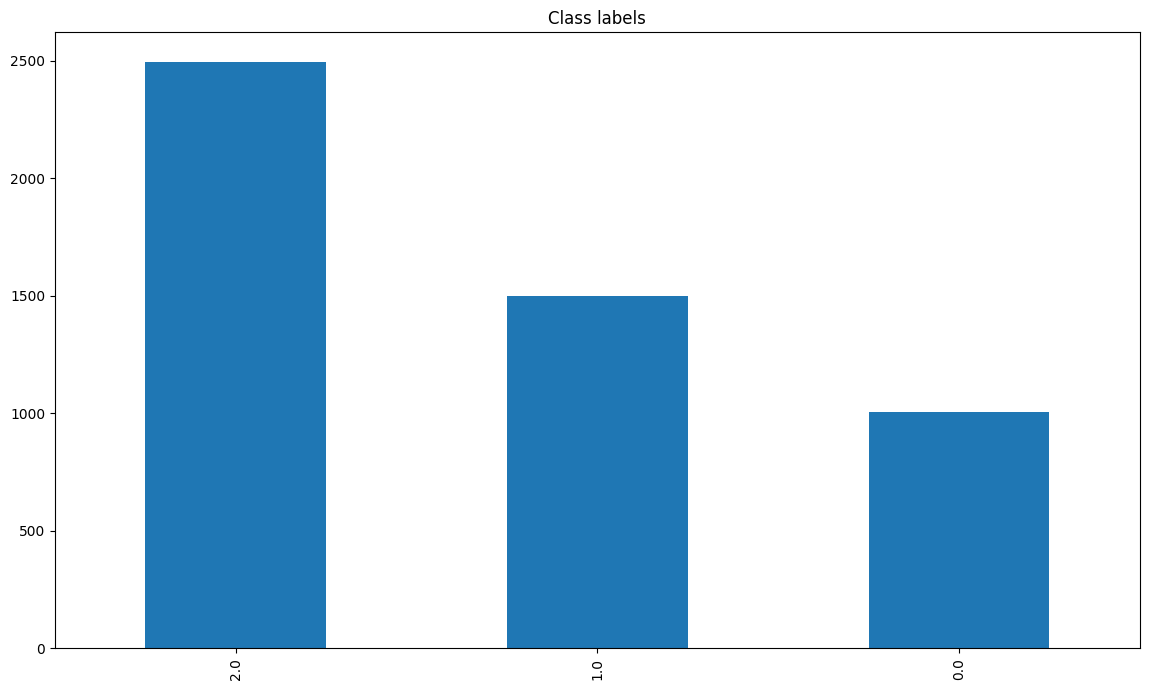

In [142]:
train_df = train_df.sort_values(by=['class'])
Class_counts = train_df['class'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Class labels")
train_df['class'].value_counts()

In the training dataset, there is an imbalance in the class labels, and this issue needs to be addressed and handled with either the oversampling method or under sampling method.Undersampling method was widely used for huge data set with large disparity in the class values. Given that we are dealing with a relatively small dataset and there are significant disparities in the class values, it is advisable to employ the SMOTE minority sampling method to balance the class labels.  

###Synthetic Minority Over-Sampling(SMOTE)


In this classification problems, we have three classes that are underrepresented in the dataset. This can lead to biased model performance, as the model may become overly biased towards the majority class.By generating synthetic samples for the minority class, SMOTE increases the representation of the minority class without duplicating existing samples. This results in a more balanced dataset.

In [146]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split


# Normally our we are given train/test data separately
# hewever for this prac we will take 25% of the iris data can pretend that it's test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_df[columns_to_leave], train_df['class'].values,
                                                    test_size=0.25, # use a teste sieve of 25%
                                                    random_state=42) # this random state ensures that we get the same subset each time we call this cell
print(y_test)
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

X_train_resampled.shape, y_train_resampled.shape



[1. 2. 2. ... 1. 2. 2.]


((5616, 32), (5616,))

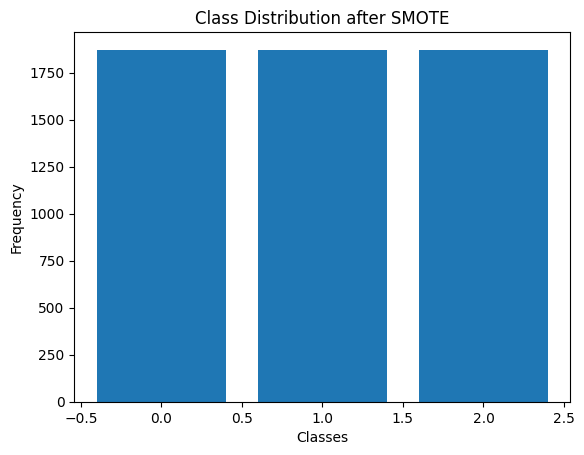

In [147]:
from collections import Counter

class_counts = Counter(y_train_resampled)

# Plot the class distribution
plt.bar(class_counts.keys(), class_counts.values())
plt.xlabel('Classes')
plt.ylabel('Frequency')
plt.title('Class Distribution after SMOTE')
plt.show()

In [148]:
X_train_resampled.shape,y_train_resampled.shape

((5616, 32), (5616,))

The SMOTE was performed to handle the skewness of the unbalanced data and after that the class distribution was happened equally to all the class. It focused on increasing the minority class values to increase the sample values.

##Cross Validation

In [149]:
# This is random sampling
ss = ShuffleSplit(n_splits=10, test_size=25, random_state=42)
# This is non-random sampling, we just break the data in to 10 contiguous sub-sets
kf = KFold(n_splits=10)
# Ensuring the balance between classes in the model/validate sets
# means we should use stratified sampling
skf = StratifiedKFold(n_splits=10)

In [150]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
cmap_data = plt.cm.Paired
cmap_cv = plt.cm.coolwarm

def plot_cv_indices(cv, X, y, group, ax, n_splits, lw=10):
    """
    Create a sample plot for indices of a cross-validation object.
    Adapted from https://scikit-learn.org/stable/auto_examples/model_selection/plot_cv_indices.html#define-a-function-to-visualize-cross-validation-behavior

    Parameters
    ----------
    cv: cross validation method

    X : training data

    y : data labels

    group : group labels

    ax : matplolib axes object

    n_splits : number of splits

    lw : line width for plotting
    """

    # Generate the training/testing visualizations for each CV split
    for ii, (tr, tt) in enumerate(cv.split(X=X, y=y, groups=group)):
        # Fill in indices with the training/test groups
        indices = np.array([np.nan] * len(X))
        indices[tt] = 1
        indices[tr] = 0

        # Visualize the results
        ax.scatter(range(len(indices)), [ii + .5] * len(indices),
                   c=indices, marker='_', lw=lw, cmap=cmap_cv,
                   vmin=-.2, vmax=1.2)

    # Plot the data classes and groups at the end
    ax.scatter(range(len(X)), [ii + 1.5] * len(X),
               c=y, marker='_', lw=lw, cmap=cmap_data)

    ax.scatter(range(len(X)), [ii + 2.5] * len(X),
               c=group, marker='_', lw=lw, cmap=cmap_data)

    # Formatting
    yticklabels = list(range(n_splits)) + ['class', 'group']
    ax.set(yticks=np.arange(n_splits+2) + .5, yticklabels=yticklabels,
           xlabel='Sample index', ylabel="CV iteration",
           ylim=[n_splits+2.2, -.2])
    ax.set_title('{}'.format(type(cv).__name__), fontsize=15)
    return ax

<ipython-input-150-8d7d688496b9>:44: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(range(len(X)), [ii + 2.5] * len(X),
<ipython-input-150-8d7d688496b9>:44: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(range(len(X)), [ii + 2.5] * len(X),


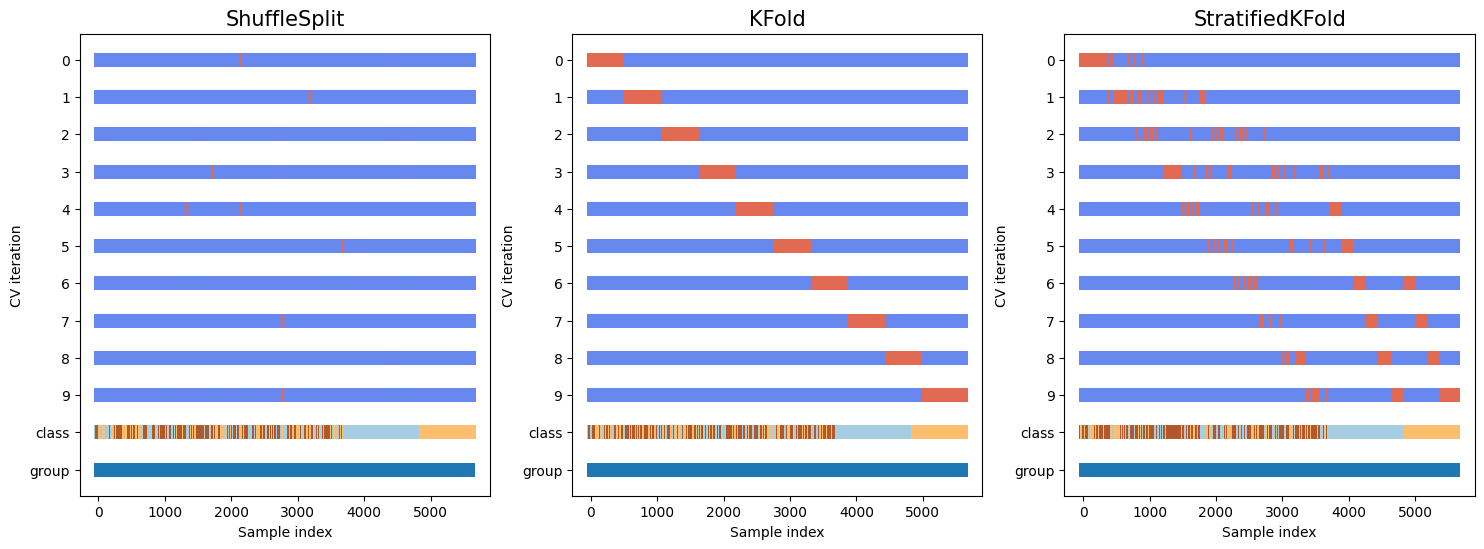

In [151]:
# Set up a figure with three subplots
fig, ax = plt.subplots(1,3, figsize=(18,6))
# visualise the ShulffleSplit algorithm
plot_cv_indices(ss,
                X_train_resampled, y_train_resampled,
                group=None,
                ax=ax[0],
                n_splits=10)
# visualise the KFolds algorithm
plot_cv_indices(kf,
                X_train_resampled, y_train_resampled,
                group=None,
                ax=ax[1],
                n_splits=10)
# visualise the StratifiedKFolds algorithm
plot_cv_indices(skf,
                X_train_resampled, y_train_resampled,
                group=None,
                ax=ax[2],
                n_splits=10)
plt.show()

##KNN Classification

In [152]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [153]:
# Create a dictionary of all the parameters we'll be iterating over
parameters = {'weights': ['uniform','distance'], # this should be the different weighting schemes
              'n_neighbors':[1,3,7,11,17,21],
              'p': [1, 2],
              } # this should be a list of the nearest neigbhours
# make a classifier object
knn = KNeighborsClassifier()
# create a GridSearchCV object to do the training with cross validation
gscv = GridSearchCV(estimator=knn,
                    param_grid=parameters,
                    cv=skf,  # the cross validation folding pattern
                    scoring='accuracy')
# now train our model
best_knn = gscv.fit(X_train_resampled, y_train_resampled)

# Get the best hyperparameters and best cross-validation score
best_params = best_knn.best_params_
best_score = best_knn.best_score_
print("Best Hyperparameters:", best_params)
print("Best Cross-Validation Score:", best_score)

# Evaluate the model on the test set using the best hyperparameters and PCA
best_model = best_knn.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print("Test Set Accuracy:", test_accuracy)

Best Hyperparameters: {'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}
Best Cross-Validation Score: 0.9012052702025487
Test Set Accuracy: 0.7184


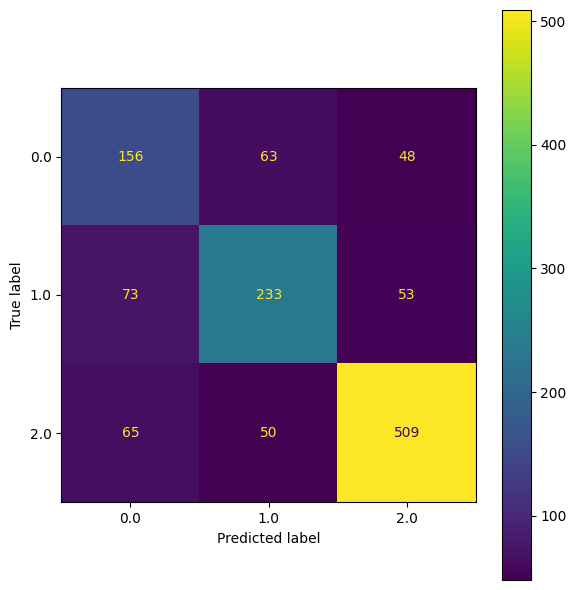

In [154]:
fig, ax = plt.subplots(1,1, figsize=(6, 6))

ConfusionMatrixDisplay.from_estimator(best_knn,
                                      X_test, y_test,
                                      ax=ax)
plt.tight_layout()
plt.show()

## Naive Bayes Classification

In [155]:
from sklearn import naive_bayes
from sklearn.metrics import accuracy_score

In [156]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming you have X_train_resampled, X_test, y_train_resampled, and y_test defined
from sklearn.feature_selection import SelectKBest, f_classif

# Assuming you have X_train_resampled, X_test, y_train_resampled, and y_test defined

# Perform feature selection using SelectKBest with k=10 (you can adjust k as needed)
selector = SelectKBest(score_func=f_classif, k=20)
X_train_selected = selector.fit_transform(X_train_resampled, y_train_resampled)
X_test_selected = selector.transform(X_test)

# Adjust the number of components as needed
# pca = PCA(n_components=0.75)

# # Transform the original data to the first two principal components
# X_train_pca = pca.fit_transform(X_train_resampled)
# X_test_pca = pca.transform(X_test)

# Create a Gaussian Naive Bayes classifier
nb = GaussianNB()

# Define the parameters for GridSearchCV
parameters = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1],
     'priors': [[0.33, 0.33, 0.34], [0.2, 0.6, 0.2], [0.4, 0.1, 0.5]]
}

# Create a GridSearchCV object
gsv = GridSearchCV(estimator=nb, param_grid=parameters, cv=skf, scoring='accuracy')

# Fit the GridSearchCV object to the training data with PCA
best_nb = gsv.fit(X_train_selected, y_train_resampled)

# Get the best hyperparameters and best cross-validation score
best_params = best_nb.best_params_
best_score = best_nb.best_score_
print("Best Hyperparameters:", best_params)
print("Best Cross-Validation Score:", best_score)

# Evaluate the model on the test set using the best hyperparameters and PCA
best_model = best_nb.best_estimator_
y_pred = best_model.predict(X_test_selected)

# Evaluate the classifier's performance using various metrics
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Test Set Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)



Best Hyperparameters: {'priors': [0.2, 0.6, 0.2], 'var_smoothing': 0.1}
Best Cross-Validation Score: 0.6654261898871485
Test Set Accuracy: 0.6848
Classification Report:
               precision    recall  f1-score   support

         0.0       0.55      0.41      0.47       267
         1.0       0.57      0.72      0.64       359
         2.0       0.81      0.79      0.80       624

    accuracy                           0.68      1250
   macro avg       0.65      0.64      0.63      1250
weighted avg       0.69      0.68      0.68      1250



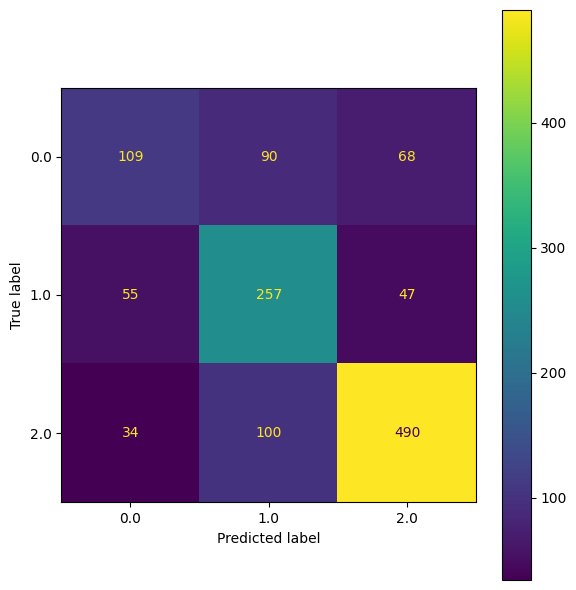

In [157]:
fig, ax = plt.subplots(1,1, figsize=(6, 6))

ConfusionMatrixDisplay.from_estimator(best_nb,
                                      X_test_selected, y_test,
                                      ax=ax)
plt.tight_layout()
plt.show()

## Decision Tree Classifier

In [158]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the classifier on the training data
dt_classifier.fit(X_train_selected, y_train_resampled)

# Make predictions on the test data
y_pred = dt_classifier.predict(X_test_selected)

# Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Decision Tree accuracy is {accuracy:5.3f}")
print("Classification Report:\n", classification_rep)

Decision Tree accuracy is 0.741
Classification Report:
               precision    recall  f1-score   support

         0.0       0.61      0.66      0.63       267
         1.0       0.69      0.72      0.71       359
         2.0       0.84      0.79      0.81       624

    accuracy                           0.74      1250
   macro avg       0.71      0.72      0.72      1250
weighted avg       0.75      0.74      0.74      1250



In [159]:
from sklearn import tree

In [160]:
# Create a dictionary of all the parameters we'll be iterating over
parameters = {'criterion': ('gini','entropy'),  # this should be the different splitting criteria
              'min_samples_split':[3,5,15,20], 'max_depth' :[3]} # this should be the different values for min_samples_split
dtc = tree.DecisionTreeClassifier()
gscv = GridSearchCV(estimator=dtc,
                    param_grid=parameters,
                    cv=skf,
                    scoring='accuracy')
best_dtc = gscv.fit(X_train_resampled, y_train_resampled)

best_params = best_dtc.best_params_
best_score = best_dtc.best_score_

print("Best Hyperparameters:", best_params)
print("Best Cross-Validation Score:", best_score)

# Evaluate the model on the test set using the best hyperparameters
best_model = best_dtc.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print("Test Set Accuracy:", test_accuracy)

Best Hyperparameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 3}
Best Cross-Validation Score: 0.5924236080715042
Test Set Accuracy: 0.5848


In [161]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import StratifiedKFold
from sklearn import tree

# Assuming you have X_train_resampled, X_test, y_train_resampled, and y_test defined

# Create a Decision Tree Classifier
dt_classifier = tree.DecisionTreeClassifier()

# Define the parameters for GridSearchCV
parameters = {
    'criterion': ['gini','entropy'],
    'min_samples_split': [3, 5, 15, 20],
    'max_depth': [3, 5],
    'class_weight': [None, 'balanced', {0: 1, 1: 2}]  # Adjust class weights as needed
}


# Create a GridSearchCV object
gscv = GridSearchCV(estimator=dt_classifier, param_grid=parameters, cv=skf, scoring='accuracy')

# Fit the GridSearchCV object to the training data
best_dtc = gscv.fit(X_train_resampled, y_train_resampled)

best_params = best_dtc.best_params_
best_score = best_dtc.best_score_

print("Best Hyperparameters:", best_params)
print("Best Cross-Validation Score:", best_score)

# Evaluate the model on the test set using the best hyperparameters
best_model = best_dtc.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Decision Tree accuracy is {accuracy:5.3f}")
print("Classification Report:\n", classification_rep)


Best Hyperparameters: {'class_weight': None, 'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 5}
Best Cross-Validation Score: 0.6853711915047481
Decision Tree accuracy is 0.662
Classification Report:
               precision    recall  f1-score   support

         0.0       0.47      0.68      0.55       267
         1.0       0.60      0.58      0.59       359
         2.0       0.85      0.70      0.77       624

    accuracy                           0.66      1250
   macro avg       0.64      0.65      0.64      1250
weighted avg       0.70      0.66      0.67      1250



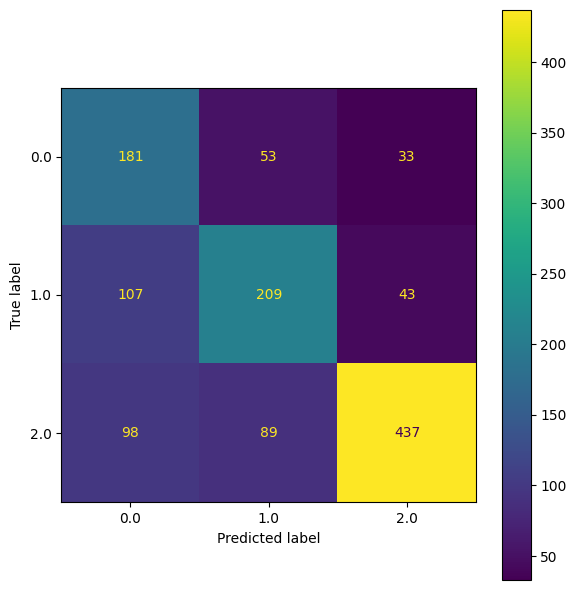

In [162]:
fig, ax = plt.subplots(1,1, figsize=(6, 6))

ConfusionMatrixDisplay.from_estimator(best_dtc,
                                      X_test, y_test,
                                      ax=ax)
plt.tight_layout()
plt.show()

## Random Forest Classification


In [163]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_resampled,y_train_resampled)

y_pred = rf_classifier.predict(X_test)

# Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Random Forest accuracy is {accuracy:5.3f}")
print("Classification Report:\n", classification_rep)


Random Forest accuracy is 0.847
Classification Report:
               precision    recall  f1-score   support

         0.0       0.79      0.78      0.78       267
         1.0       0.81      0.85      0.83       359
         2.0       0.89      0.87      0.88       624

    accuracy                           0.85      1250
   macro avg       0.83      0.83      0.83      1250
weighted avg       0.85      0.85      0.85      1250



In [164]:
rf_classifier = RandomForestClassifier()
rf_parameters = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Create a GridSearchCV object for Random Forest
rf_gsv = GridSearchCV(estimator=rf_classifier, param_grid=rf_parameters, cv=skf, scoring='accuracy')

# Fit the GridSearchCV object to the training data
best_rf = rf_gsv.fit(X_train_resampled, y_train_resampled)

best_params = best_rf.best_params_
best_score = best_rf.best_score_

print("Best Hyperparameters:", best_params)
print("Best Cross-Validation Score:", best_score)

# Evaluate the model on the test set using the best hyperparameters
best_model = best_rf.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print("Test Set Accuracy:", test_accuracy)

Best Hyperparameters: {'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 200}
Best Cross-Validation Score: 0.9300391395639458
Test Set Accuracy: 0.8608


# Model Comparision

In [ ]:
# Choose the top two models based on accuracy
top_models = {}
top_models['KNN'] = best_knn.best_score_
top_models['Decision Tree'] = best_dtc.best_score_
top_models['Naive Bayes'] = best_nb.best_score_
top_models['Random Forest'] = best_rf.best_score_
# Sort the models by accuracy and select the top two
top_models = dict(sorted(top_models.items(), key=lambda item: item[1], reverse=True)[:2])

print("Top Two Models:", top_models)


Top Two Models: {'Random Forest': 0.9296773668975833, 'KNN': 0.8941444693791263}


# Predicting Test Class labels

In [165]:
X_test_df =test_df
# In the test Dataframe, the class was removed in the inital stage for data preprocessing.

In [168]:
# Predict the class labels for the test data
y_test_rf = best_rf.predict(X_test_df)
# Print the predicted labels (optional)
print("Predicted Class Labels for Test Data:", y_test_rf)


Predicted Class Labels for Test Data: [1. 1. 1. 2. 1. 0. 2. 1. 1. 0. 0. 1. 1. 1. 2. 2. 0. 2. 0. 2. 1. 2. 2. 1.
 2. 2. 2. 2. 0. 2. 2. 1. 0. 1. 1. 2. 2. 1. 1. 2. 2. 2. 1. 1. 1. 2. 0. 2.
 2. 1. 2. 0. 0. 0. 2. 2. 2. 0. 2. 1. 2. 2. 0. 2. 2. 2. 1. 2. 1. 2. 2. 1.
 0. 0. 2. 2. 1. 2. 2. 1. 2. 0. 1. 0. 2. 1. 1. 1. 1. 1. 0. 1. 1. 2. 2. 0.
 1. 2. 1. 2. 2. 0. 2. 2. 2. 2. 0. 1. 2. 2. 1. 0. 2. 2. 2. 1. 1. 2. 0. 2.
 2. 1. 2. 1. 1. 0. 1. 2. 1. 1. 1. 2. 1. 1. 2. 1. 0. 2. 2. 2. 1. 2. 2. 2.
 0. 0. 2. 1. 2. 2. 0. 2. 2. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 2. 1. 2. 2. 2.
 1. 2. 0. 1. 2. 1. 1. 0. 2. 0. 0. 2. 2. 2. 2. 1. 2. 2. 2. 2. 1. 2. 1. 2.
 1. 0. 2. 1. 2. 1. 2. 2. 1. 1. 0. 1. 0. 0. 2. 2. 2. 1. 2. 1. 1. 1. 2. 1.
 2. 1. 0. 1. 0. 0. 2. 0. 0. 1. 2. 0. 2. 0. 0. 2. 2. 0. 2. 2. 2. 2. 2. 2.
 1. 2. 1. 2. 1. 2. 0. 2. 0. 2. 1. 0. 2. 1. 2. 0. 2. 0. 1. 2. 1. 2. 2. 1.
 2. 2. 1. 1. 2. 2. 2. 0. 2. 2. 0. 2. 2. 2. 0. 0. 2. 1. 1. 1. 0. 2. 2. 2.
 0. 1. 1. 1. 2. 2. 2. 1. 0. 1. 0. 2. 2. 0. 2. 2. 1. 1. 1. 2. 1. 1. 1. 0.
 1. 2. 0. 2. 

In [169]:
# Predict the class labels for the test data
y_test_knn = best_knn.predict(X_test_df)
# Print the predicted labels (optional)
print("Predicted Class Labels for Test Data:", y_test_knn)


Predicted Class Labels for Test Data: [1. 1. 1. 2. 1. 0. 2. 0. 1. 0. 0. 1. 0. 1. 2. 2. 0. 0. 0. 2. 1. 0. 2. 1.
 0. 2. 2. 2. 0. 2. 2. 1. 2. 2. 2. 0. 2. 1. 1. 2. 2. 0. 2. 1. 1. 2. 0. 2.
 2. 1. 2. 2. 1. 0. 2. 2. 2. 0. 1. 1. 2. 2. 0. 2. 2. 2. 0. 2. 0. 0. 2. 2.
 1. 2. 2. 2. 0. 2. 0. 1. 2. 2. 1. 0. 2. 1. 2. 0. 1. 1. 0. 0. 1. 2. 2. 0.
 1. 2. 1. 1. 0. 1. 2. 2. 2. 2. 0. 2. 0. 2. 1. 2. 2. 0. 1. 0. 1. 1. 0. 2.
 2. 0. 2. 1. 0. 1. 1. 2. 1. 1. 1. 1. 1. 1. 2. 1. 0. 2. 1. 2. 1. 2. 2. 0.
 1. 0. 2. 0. 0. 2. 2. 2. 2. 1. 0. 0. 2. 1. 1. 0. 1. 1. 1. 2. 0. 2. 2. 2.
 0. 2. 1. 1. 2. 1. 1. 0. 2. 1. 0. 2. 2. 2. 2. 1. 2. 2. 2. 2. 1. 2. 2. 2.
 1. 0. 2. 0. 2. 1. 2. 2. 1. 1. 0. 2. 2. 0. 2. 2. 2. 2. 1. 1. 1. 2. 2. 1.
 2. 2. 2. 1. 1. 1. 2. 0. 1. 2. 2. 0. 0. 0. 0. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 1. 2. 2. 2. 0. 2. 0. 2. 1. 0. 2. 1. 2. 0. 2. 1. 0. 2. 1. 0. 2. 0.
 2. 2. 2. 1. 2. 2. 2. 0. 1. 0. 0. 2. 2. 2. 2. 0. 2. 1. 0. 2. 2. 1. 2. 2.
 0. 1. 1. 0. 1. 2. 2. 1. 1. 1. 1. 2. 0. 1. 2. 2. 1. 1. 2. 2. 1. 1. 1. 2.
 1. 2. 0. 2. 

In [174]:
import sqlite3
conn = sqlite3.connect('A.sqlite')
cursor = conn.cursor()

# Create a table to store predictions
cursor.execute('''CREATE TABLE IF NOT EXISTS predictions
                  (Id integer PRIMARY KEY,
                  Predict1 INTEGER,
                  Predict2 INTEGER)''')

# Iterate through the test data and store predictions in the database
for Id, (pred1, pred2) in enumerate(zip(y_test_rf, y_test_knn), start=500):
    cursor.execute('''INSERT INTO predictions (Id , Predict1, Predict2)
                      VALUES (?, ?, ?)''', (Id, pred1, pred2))

# Commit changes and close the database
conn.commit()
conn.close()